# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Scoping an analytics project

### Project submission group
- Group member 1
    - Name: Jaz Zhou
    - Email: jz878@drexel.edu


### Additional submission comments
- Tutoring support received: NA
- Other (other): NA

## 1. Abstract
This project explores the topic of smart cities within the realm of urban design, specifically, focusing on understanding and analyzing taxi trajectories in the lights of understanding this particular transportation pattern, and maybe developed into similarity search and/or prediction model.

We utilized a Kaggle dataset, specifically the "train.csv" file with 1.7 million taxi trajectories, averaging 50 points each. Additionally, the "test.csv" file provided snapshots of ongoing trips at specific timestamps (14/08/2014 18:00:00, 30/09/2014 08:30:00, 06/10/2014 17:45:00, 01/11/2014 04:00:00, and 21/12/2014 14:30:00).

The exploratory data analysis offers initial insights for in-depth analysis model.

**Key findings include**:

- **"DAY_TYPE" data revised**: addressing concerns about the reliability of the "DAYTYPE" feature. Mostly showing type 'A' days, we revised it using a holiday list for more accurate time pattern representation.

- **Popular Stand Existence**: Stand 15 emerged as the most frequented, crucial for resource optimization and service efficiency.

- **Temporal Patterns**: Distinct peaks around 8:50 AM and local peaks at sharp hours provide insights for effective fleet management.

- **Trajectory Length**: Median trajectory length is 4.69 km, varying by call type.

- **Sampling Rate**: Moderate variability in taxi trajectory sampling rates(median = 11, mean = 11.9 per taxi per day), with notable variations observed(std = 6.4, min = 1, max = 266 per taxi per day).

- **Correlation**: No discernible linear or non-linear correlation among 'CALL_TYPE,' 'TAXI_ID,' 'DAY_TYPE_REVISED,' and 'TIMESTAMP,' indicating independence of features.

Acknowledging dataset limitations, including variations in GPS data completeness and the study's confined scope to a single city for a specific year, ensures a comprehensive understanding within the project's context.


## 2. Identified Skills & Areas needing Growth

### Jaz Zhou



####  Identified Skills


I used to study and work in Architecture and Urban Design, equiping me the ability to identify and leverage relevant data for the continual improvement of urban design and operational processes. My skills encompass:

- Utilizing my architectural knowledge to identify key areas of focus in urban design.
- Interpreting data through the lens of urban design principles.
- Recognizing the application or research value of chosen topic.

  
####  Areas requiring growth

While traditional urban design relies on experience and intuition, the integration of data science opens avenues for quantification and evidence-based decision-making. To enhance my skill set, I am eager to delve deeper into:

- Developing proficiency in data visualization to communicate findings effectively to stakeholders.
- Exploring various machine learning algorithms such as regression, clustering, and classification to analyze urban patterns.
- Delving into deep learning models to uncover complex relationships within urban data, allowing for predictive modeling and scenario analysis.

## 3. Topic Choice

In the realm of city planning, smart cities are quite a hot topic. One key part is improving how we interpret  traffic patterns using advanced technology and data.

Specifically, for this project, we're looking at taxi routes – studying where they go and predicting where they'll go next. This helps us understand popular routes, congestion points, and commuter preferences.

**Goals of the Project**:

-**Find Similar Routes**:
    Employ machine learning algorithms to identify patterns in taxi trajectories. Clustering techniques can group similar routes, highlighting popular paths taken by taxis.
    Utilize spatial data analysis to identify common starting and ending points, as well as recurring routes. This information is valuable for understanding commuter behavior.

-**Predict Future Routes**:
    Train machine learning models to predict future taxi trajectories based on historical data. This can assist in proactive traffic management and resource allocation.
    Predicting how traffic conditions might evolve can help in optimizing traffic signal timings and managing road infrastructure.


## 4. Relevant Pre-processed Data Selection

As GPS-enabled devices become widespread, trajectory data is being generated rapidly. We possess a strong dataset sourced from `Kaggle` covering `a full year (01/07/2013 to 30/06/2014)` detailing the `trajectories of 442 taxis in Porto, Portugal`[1]. This valuable information is neatly organized in a single CSV file named "train.csv," allowing for in-depth exploration and insights into the city's transportation dynamics.


[1] Meghan O'Connell, moreiraMatias, Wendy Kan, "ECML/PKDD 15: Taxi Trajectory Prediction (I)," Kaggle, 2015. [Online]. Available: https://kaggle.com/competitions/pkdd-15-predict-taxi-service-trajectory-i



### 4.1 Acquire data

To download the data zip file, you can go to the website and download, or install kaggle and register an api to acquire it.

In [4]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jazzhou","key":"cc340e8b471b497acec985317a9d90c4"}'}

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

after installing the kaggle.
- hop to kaggle's website and create an acount
- go to acount - settings - API - create a new token
- paste the downloaded token `kaggle.json` into `Users/yourUserName/.kaggle/`

then run the code below to download the zip file.

In [8]:
!kaggle competitions download -c pkdd-15-predict-taxi-service-trajectory-i

 98% 498M/509M [00:04<00:00, 131MB/s]
100% 509M/509M [00:04<00:00, 126MB/s]


Next, unzip the zip file and extract the raw data.

In [9]:
import zipfile

def unzip(zip_file_path, extracted_folder_path):

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents into the specified folder
        zip_ref.extractall(extracted_folder_path)

    # Optionally, you can print a message to confirm the extraction
    print(f"File '{zip_file_path}' has been successfully extracted to '{extracted_folder_path}'.")


In [10]:
unzip('pkdd-15-predict-taxi-service-trajectory-i.zip', 'data')

unzip('data/train.csv.zip', 'data/trainData')

unzip('data/test.csv.zip', 'data/testData')

unzip('data/metaData_taxistandsID_name_GPSlocation.csv.zip', 'data/metaData')


File 'pkdd-15-predict-taxi-service-trajectory-i.zip' has been successfully extracted to 'data'.
File 'data/train.csv.zip' has been successfully extracted to 'data/trainData'.
File 'data/test.csv.zip' has been successfully extracted to 'data/testData'.
File 'data/metaData_taxistandsID_name_GPSlocation.csv.zip' has been successfully extracted to 'data/metaData'.


In [31]:
import os
print(os.getcwd())

/content


In [32]:
print(os.listdir())

['.config', 'pkdd-15-predict-taxi-service-trajectory-i.zip', 'data', 'sample_data']


### 4.2 Raw Data

The raw data includes train.csv, test.csv and meta data csv file.

**1. train.csv file**

train.csv contains 1.7 million taxi trajectories collected from Porto, Portugal, between July 2013
and June 2014. The trajectory points do not come with timestamps. The average number of points
per trajectory is 50.

Each data sample corresponds to one completed trip. It contains a total of 9 (nine) features, described as follows:

- **TRIP_ID:** (String) Unique identifier for each trip.
- **CALL_TYPE:** (char) Identifies the way used to demand this service. It may contain one of three possible values:
  - 'A' if this trip was dispatched from the central.
  - 'B' if this trip was demanded directly to a taxi driver on a specific stand.
  - 'C' otherwise (i.e. a trip demanded on a random street).
- **ORIGIN_CALL:** (integer) Unique identifier for each phone number which was used to demand, at least, one service. It identifies the trip’s customer if CALL_TYPE='A'. Otherwise, it assumes a NULL value.
- **ORIGIN_STAND:** (integer) Unique identifier for the taxi stand. It identifies the starting point of the trip if CALL_TYPE='B'. Otherwise, it assumes a NULL value.
- **TAXI_ID:** (integer) Unique identifier for the taxi driver that performed each trip.
- **TIMESTAMP:** (integer) Unix Timestamp (in seconds). Identifies the trip’s start.
- **DAYTYPE:** (char) Identifies the daytype of the trip’s start. It assumes one of three possible values:
  - 'B' if this trip started on a holiday or any other special day.
  - 'C' if the trip started on a day before a type-B day.
  - 'A' otherwise (i.e. a normal day, workday, or weekend).
- **MISSING_DATA:** (Boolean) FALSE when the GPS data stream is complete and TRUE whenever one (or more) locations are missing.
- **POLYLINE:** (String) Contains a list of GPS coordinates (i.e. WGS84 format) mapped as a string. The beginning and the end of the string are identified with brackets (i.e. [ and ], respectively). Each pair of coordinates is also identified by the same brackets as [LONGITUDE, LATITUDE]. This list contains one pair of coordinates for each 15 seconds of the trip. The last list item corresponds to the trip’s destination while the first one represents its start.




In [4]:
import pandas as pd

def readCsvToDf(csv_path):
    df = pd.read_csv(csv_path)
    return df

In [6]:
train_csv_path = 'data/trainData/train.csv'
train_df = readCsvToDf(train_csv_path)
train_df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


**2. test.csv file**

test.csv includes five test sets. Each one of these datasets refer to trips that occurred between 01/07/2014 and 31/12/2014. Each one of these data sets will provide a snapshot of the current network status on a given timestamp. It will provide partial trajectories for each one of the on-going trips during that specific moment.

The five snapshots included on the test set refer to the following timestamps:

- 14/08/2014 18:00:00

- 30/09/2014 08:30:00

- 06/10/2014 17:45:00

- 01/11/2014 04:00:00
- 21/12/2014 14:30:00



In [34]:
test_csv_path = 'data/testData/test.csv'
test_df = readCsvToDf(test_csv_path)
test_df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,T1,B,NaN,15.0,20000542,1408039037,A,False,"[[-8.585676,41.148522],[-8.585712,41.148639],[..."
1,T2,B,NaN,57.0,20000108,1408038611,A,False,"[[-8.610876,41.14557],[-8.610858,41.145579],[-..."
2,T3,B,NaN,15.0,20000370,1408038568,A,False,"[[-8.585739,41.148558],[-8.58573,41.148828],[-..."
3,T4,B,NaN,53.0,20000492,1408039090,A,False,"[[-8.613963,41.141169],[-8.614125,41.141124],[..."
4,T5,B,NaN,18.0,20000621,1408039177,A,False,"[[-8.619903,41.148036],[-8.619894,41.148036]]"


**3. metaData.csv file**

includes taxi `stand id name` and `Latitude`, `Longitude`.

In [ ]:
meta_csv_path = 'data/metaData/metaData_taxistandsID_name_GPSlocation.csv'
meta_df = readCsvToDf(meta_csv_path)
meta_df.head()

,ID,Descricao,Latitude,Longitude
0,1,Agra,41.1771457135,-8.609670
1,2,Alameda,41.15618964,-8.591064
2,3,Aldoar,41.1705249231,-8.665876
3,4,Alfândega,41.1437639911,-8.621803
4,5,Amial,41.1835097223,-8.612726



### Learn the one-hot vector representation of coordinates

To transform continuous GPS coordinates into discrete tokens for more effective data analysis, we convert continuous longitude and latitude coordinates into tokens. We split the space into equal-sized cells, treating each cell as a token. This means all sample points in the same cell get mapped to the same token.

* Cell size: The default cell size in the experiments is 100 meters.

**Benefits of This Approach:**
- **Dimensionality Reduction:** Simplifies the complex input space of continuous coordinates into a manageable set of discrete tokens.
- **Enhanced Spatial Analysis:** Facilitates the identification of spatial relationships and patterns that may not be evident in continuous data.
- **Application of NLP Techniques:** Enables the use of NLP methodologies, like RNNs and LSTMs, for analyzing spatial data by treating trajectories as sequences of tokens.


### get the boundary box of Porto
To begin, we define the boundaries of the cells, ensuring a buffer of 0.1 units around the city of Porto. This buffer helps mitigate the impact of noisy coordinates from raw trajectories, preventing them from excessively enlarging the cells' dimensions.

In [38]:
import folium
from geopy.geocoders import Nominatim
from IPython.display import IFrame

def get_bounding_box(city_name, buffer=0.1):
    geolocator = Nominatim(user_agent="city_bounding_box")
    location = geolocator.geocode(city_name)

    if location is None:
        return None

    # Extracting coordinates
    lat = location.latitude
    lon = location.longitude

    # Calculating bounding box
    lat_min_boundary = lat - buffer
    lat_max_boundary = lat + buffer
    lon_min_boundary = lon - buffer
    lon_max_boundary = lon + buffer

    return lat_min_boundary, lat_max_boundary, lon_min_boundary, lon_max_boundary

city_name = "Porto"
bounding_box = get_bounding_box(city_name)

if bounding_box:
    print(f"Bounding box for {city_name}: {bounding_box}")
else:
    print(f"Could not find coordinates for {city_name}")

# Display the map
if bounding_box:
    map_center = [(bounding_box[0] + bounding_box[1]) / 2, (bounding_box[2] + bounding_box[3]) / 2]
    m = folium.Map(location=map_center, zoom_start=10)
    folium.Rectangle(bounds=[(bounding_box[0], bounding_box[2]), (bounding_box[1], bounding_box[3])],
                      color='blue',
                      fill_opacity=0.1).add_to(m)
    map_name = "map.html"
    m.save(map_name)
    display(IFrame(src=map_name, width=1200, height=500))


Bounding box for Porto: (41.0494512, 41.2494512, -8.7107884, -8.510788400000001)


### remove trajectories that are out of boundary
We remove trajectories that fall outside the boundary of Porto. Out of 1,710,670 trajectories in the training data, 1,687,544 remain within the boundary. This simplifies the data handling process, focusing only on trajectories relevant to the defined area.

In [74]:
import ast
import pandas as pd

def drop_trajectory_outside_boundary(df, boundary_box):
    """
    Filters rows from the input DataFrame based on coordinate conditions.

    Parameters:
    df (DataFrame): Input DataFrame containing the 'POLYLINE' column.
    boundary_box (tuple): Tuple containing the boundary box coordinates (lat_min, lat_max, lon_min, lon_max).

    Returns:
    DataFrame: Filtered DataFrame with rows dropped based on coordinate conditions.
    """
    filtered_rows = []
    count = 0
    for index, row in df.iterrows():
        polyline_list = ast.literal_eval(row['POLYLINE'])
        drop_row = False

        for coord in polyline_list:
            lon, lat = coord
            # Check if coordinate is outside the bounding box
            if not (boundary_box[0] <= lat <= boundary_box[1] and boundary_box[2] <= lon <= boundary_box[3]):
                count += 1
                if (count%100 == 0):
                    print(".", end="")
                drop_row = True
                break

        if not drop_row:
            filtered_rows.append(row)

    filtered_df = pd.DataFrame(filtered_rows)
    return filtered_df


In [9]:
print(train_df.shape)
print("Dropping trajectory outside boundary for train data", end="\n")
filtered_train_df = drop_trajectory_outside_boundary(train_df, bounding_box)
print()
print(filtered_train_df.shape)

(1710670, 9)
Dropping trajectory with noisy coordinates
.......................................................................................................................................................................................................................................
(1687544, 9)


In [11]:
filtered_train_df.to_csv('data/trainData/filtered_train_df.csv', index=False)

### get the cell grids dimensions
Based on the boundary box and the specified cell size, the dimensions of the cell grid are determined to be 223 cells wide and 168 cells tall. This means that the geographical area encompassing Porto has been discretized into a grid consisting of 223 columns and 168 rows of cells.

In [40]:
import numpy as np
import json
import pandas as pd


def calculate_cell_dimensions(boundary_box, cell_size_meters=100):
    """
    Calculate the number of rows and columns in the grid.

    Parameters:
    - boundary_box: Spatial bounds of the area.
    - cell_size_meters: Size of each cell in meters.

    Returns:
    - Tuple (num_rows, num_cols): Dimensions of the grid.
    """

    min_lat = boundary_box[0]
    max_lat = boundary_box[1]
    min_lon = boundary_box[2]
    max_lon = boundary_box[3]
   
    
    # Earth's radius in meters and conversion factor from degrees to meters
    R = 6371000
    m_per_deg_lat = R * np.pi / 180
    avg_lat = np.radians((min_lat + max_lat) / 2)
    m_per_deg_lon = R * np.cos(avg_lat) * np.pi / 180

    # Calculate grid dimensions
    
    lat_extent_m = (max_lat - min_lat) * m_per_deg_lat
    lon_extent_m = (max_lon - min_lon) * m_per_deg_lon
    num_rows = int(np.ceil(lat_extent_m / cell_size_meters))
    num_cols = int(np.ceil(lon_extent_m / cell_size_meters))

    return num_rows, num_cols



In [42]:
# Calculate Grid Dimensions

num_rows, num_cols = calculate_grid_dimensions(bounding_box)
print(num_rows, num_cols)


223 168


### converting raw trajectory into one-hot vector representations
We're converting the raw trajectory data into one-hot vector representations, where each point is encoded with only the cell ID. Instead of saving the complete sparse vectors, we'll store only the cell IDs in JSON files. 

To keep things manageable, we're slicing trajectories into chunks of 100,000 and saving each chunk separately. This helps prevent any issues with system resources and keeps the process safe.

In [75]:

def polyline_to_onehot(polyline_series, gps_to_cell_index_func, min_lon, min_lat, max_lon, max_lat, num_rows, num_cols):
    """
    Convert a series of polyline strings to lists of one-hot encoded vectors.

    Parameters:
    - polyline_series (pandas.Series): Series containing POLYLINE strings with GPS coordinates.
    - gps_to_cell_index_func (function): Function that maps GPS coordinates to a cell index.
    - min_lon, min_lat, max_lon, max_lat (floats): Spatial bounds of the grid.
    - num_rows, num_cols (int): Dimensions of the grid (number of rows and columns).


    Returns:
    - pandas.Series: A Series where each element is a list of one-hot encoded vectors representing the trajectory.
    """

    one_hot_series = polyline_series.apply(lambda polyline_str: _polyline_str_to_onehot(polyline_str, gps_to_cell_index_func, min_lon, min_lat, max_lon, max_lat, num_rows, num_cols))
    return one_hot_series

def _polyline_str_to_onehot(polyline_str, gps_to_cell_index_func, min_lon, min_lat, max_lon, max_lat, num_rows, num_cols):
    gps_coordinates = json.loads(polyline_str)
    one_hot_vectors = []
    for lon, lat in gps_coordinates:
        cell_index = gps_to_cell_index_func(lon, lat, min_lon, min_lat, num_rows, num_cols)        
        one_hot_vectors.append(cell_index)
    return one_hot_vectors

def gps_to_cell_index(lon, lat, min_lon, min_lat, num_rows, num_cols, cell_size_meters=100):
    """
    Map GPS coordinates to a grid cell index.

    Parameters:
    - lon, lat: GPS coordinates.
    - min_lon, min_lat: Minimum longitude and latitude of the grid.
    - num_rows, num_cols: Grid dimensions.
    - cell_size_meters: Cell size.

    Returns:
    - int: Index of the cell.
    """
    # Convert GPS coordinates to meters
    R = 6371000
    m_per_deg_lat = R * np.pi / 180
    avg_lat = np.radians((min_lat + lat) / 2)
    m_per_deg_lon = R * np.cos(avg_lat) * np.pi / 180

    lat_m = (lat - min_lat) * m_per_deg_lat
    lon_m = (lon - min_lon) * m_per_deg_lon

    # Calculate row and column in the grid
    row = int(lat_m / cell_size_meters)
    col = int(lon_m / cell_size_meters)

    # Ensure row and column are within the bounds of the grid
    row = min(max(row, 0), num_rows - 1)
    col = min(max(col, 0), num_cols - 1)

    return row * num_cols + col

In [76]:
import os

def slice_and_convert_polylines(df, start_index, end_index, gps_to_cell_index, min_lon, min_lat, max_lon, max_lat, num_rows, num_cols, directory_path):
    """
    Slices a range of polylines from a dataframe, converts them into one-hot encoded vectors based on their geographical position, and saves the result to a JSON file.
    
    Parameters:
    - df: DataFrame containing the polyline data.
    - start_index: The starting index of the slice.
    - end_index: The ending index of the slice.
    - gps_to_cell_index: A function that converts GPS coordinates to cell indices.
    - min_lon: Minimum longitude of the area of interest.
    - min_lat: Minimum latitude of the area of interest.
    - max_lon: Maximum longitude of the area of interest.
    - max_lat: Maximum latitude of the area of interest.
    - num_rows: Number of rows in the grid representation.
    - num_cols: Number of columns in the grid representation.
    - directory_path: The directory path where the JSON file will be saved.
    
    The function will check if the directory exists and create it if necessary before saving the JSON file.
    """
    # Ensure the directory exists
    if not os.path.exists(directory_path):
        os.makedirs(directory_path, exist_ok=True)

    # Slicing polylines from the dataframe
    sliced_polylines = df['POLYLINE'][start_index:end_index]
    
    # Convert polyline strings to one-hot encoded vectors
    one_hot_series = polyline_to_onehot(sliced_polylines, gps_to_cell_index, min_lon, min_lat, max_lon, max_lat, num_rows, num_cols)
    
    json_str = one_hot_series.to_json()
    
    file_path = f'{directory_path}/one_hot_vectors_batch_{start_index}_{end_index}.json'  
    with open(file_path, 'w') as file:
        file.write(json_str)
    
    # Print saving information
    print(f"Saved batch from index {start_index} to {end_index} to file: {file_path}")


In [27]:
import pandas as pd
import json
import pandas as pd
import numpy as np

def readCsvToDf(csv_path):
    df = pd.read_csv(csv_path)
    return df

filtered_train_df = readCsvToDf('data/trainData/filtered_train_df.csv')



In [72]:
# Step 3: Convert Polylines to One-Hot Encoded Vectors
min_lon = -8.710785 
min_lat = 41.049459 
max_lon = -8.510796 
max_lat = 41.249448
num_rows = 223
num_cols = 168

df_num_rows = len(filtered_train_df)
batch_size = 100000
for i in range(0, df_num_rows, batch_size):
    start_index = i
    end_index = min(i + batch_size, df_num_rows)
    slice_and_convert_polylines(filtered_train_df, start_index, end_index, gps_to_cell_index=gps_to_cell_index, min_lon=min_lon, min_lat=min_lat, max_lon=max_lon, max_lat=max_lat, num_rows=num_rows, num_cols=num_cols, directory_path = 'data/trainData/oneHotVectorData')
# slice_and_convert_polylines(filtered_train_df, start_index=0, end_index=len(filtered_train_df), gps_to_cell_index=gps_to_cell_index, min_lon=min_lon, min_lat=min_lat, max_lon=max_lon, max_lat=max_lat, num_rows=num_rows, num_cols=num_cols, directory_path = 'data/trainData')


Saved batch from index 0 to 100000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_0_100000.json
Saved batch from index 100000 to 200000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_100000_200000.json
Saved batch from index 200000 to 300000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_200000_300000.json
Saved batch from index 300000 to 400000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_300000_400000.json
Saved batch from index 400000 to 500000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_400000_500000.json
Saved batch from index 500000 to 600000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_500000_600000.json
Saved batch from index 600000 to 700000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_600000_700000.json
Saved batch from index 700000 to 800000 to file: data/trainData/oneHotVectorData/one_hot_vectors_batch_700000_800000.json
Saved batch from index 800000 to 9

### same process of the test data
Apply the same process to the test data: discard trajectories falling outside the boundary, and convert them into one-hot vectors.

In [77]:

print(test_df.shape)
print("Dropping trajectory outside boundary for test data", end="\n")
filtered_test_df = drop_trajectory_outside_boundary(test_df, bounding_box)
print()
print(filtered_test_df.shape)

filtered_test_df.to_csv('data/testData/filtered_test_df.csv', index=False)

(320, 9)
Dropping trajectory outside boundary for test data

(316, 9)


In [78]:
slice_and_convert_polylines(filtered_test_df, start_index=0, end_index=len(filtered_test_df), gps_to_cell_index=gps_to_cell_index, min_lon=min_lon, min_lat=min_lat, max_lon=max_lon, max_lat=max_lat, num_rows=num_rows, num_cols=num_cols, directory_path = 'data/testData/oneHotVectorData')


Saved batch from index 0 to 316 to file: data/testData/oneHotVectorData/one_hot_vectors_batch_0_316.json


### visualize the one-hot vectors
Let's verify our approach by plotting the trajectory as one-hot vectors, with cells represented as white (for the cell with the corresponding cell_id) against a black background. From the sample plots, we can observe success: trajectories vary in length, with some extensive and others just a single dot. Overall, the plots appear reasonable and resemble a genuine trajectory pixel image.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import json
import random

def plot_zoomed_cells_subplot(cell_ids, subplot_pos, num_rows=223, num_cols=168, padding=5, ax=None):
    """
    Plots a zoomed-in image of a grid with specified IDs blacked out on a subplot.
    
    :param grid_ids: List of grid IDs to black out.
    :param subplot_pos: Position of the subplot.
    :param num_rows: Number of rows in the grid.
    :param num_cols: Number of columns in the grid.
    :param padding: Padding around the zoomed region for better visibility.
    :param ax: Axes object to plot on.
    """
    # Initialize the cell
    cell = np.zeros((num_rows, num_cols))
    
    # Black out the specified cells
    for cell_id in cell_ids:
        row = cell_id // num_cols
        col = cell_id % num_cols
        cell[row, col] = 1

    # Recalculate the positions to find the bounds
    rows = [cell_id // num_cols for cell_id in cell_ids]
    cols = [cell_id % num_cols for cell_id in cell_ids]

    # Find the bounding box of the specified cells
    min_row, max_row = min(rows), max(rows)
    min_col, max_col = min(cols), max(cols)

    # Add some padding to the bounding box for better visibility
    min_row = max(0, min_row - padding)
    max_row = min(num_rows - 1, max_row + padding)
    min_col = max(0, min_col - padding)
    max_col = min(num_cols - 1, max_col + padding)

    # Zoom in on the specified region
    zoomed_cell = cell[min_row:max_row+1, min_col:max_col+1]

    # Plot on the specified subplot
    ax.imshow(zoomed_grid, cmap='gray')
    ax.axis('off')  # Hide the axes




In [173]:
import numpy as np
import matplotlib.pyplot as plt

def plot_zoomed_cells_subplot(cell_ids, subplot_pos, num_rows=223, num_cols=168, padding=5, ax=None):
    """
    Plots a zoomed-in image of a grid with specified IDs in black (with alpha transparency) on a white background.
    
    :param cell_ids: List of cell IDs to highlight.
    :param subplot_pos: Position of the subplot.
    :param num_rows: Number of rows in the grid.
    :param num_cols: Number of columns in the grid.
    :param padding: Padding around the zoomed region for better visibility.
    :param ax: Axes object to plot on.
    """
    # Initialize the grid to white
    grid = np.ones((num_rows, num_cols, 4))  # Use RGBA for the third dimension
    
    # Set specified cells to black with alpha=0.5
    for cell_id in cell_ids:
        row = cell_id // num_cols
        col = cell_id % num_cols
        grid[row, col] = [0, 0, 0, 0.5]  # RGBA for black with alpha 0.5

    # Recalculate the positions to find the bounds
    rows = [cell_id // num_cols for cell_id in cell_ids]
    cols = [cell_id % num_cols for cell_id in cell_ids]

    # Find the bounding box of the specified cells
    min_row, max_row = min(rows), max(rows)
    min_col, max_col = min(cols), max(cols)

    # Add some padding to the bounding box for better visibility
    min_row = max(0, min_row - padding)
    max_row = min(num_rows - 1, max_row + padding)
    min_col = max(0, min_col - padding)
    max_col = min(num_cols - 1, max_col + padding)

    # Zoom in on the specified region
    zoomed_grid = grid[min_row:max_row+1, min_col:max_col+1]

    # Plot on the specified subplot
    if ax is not None:
        ax.imshow(zoomed_grid)
        ax.axis('off')  # Hide the axes
    else:
        plt.imshow(zoomed_grid)
        plt.axis('off')
        plt.show()




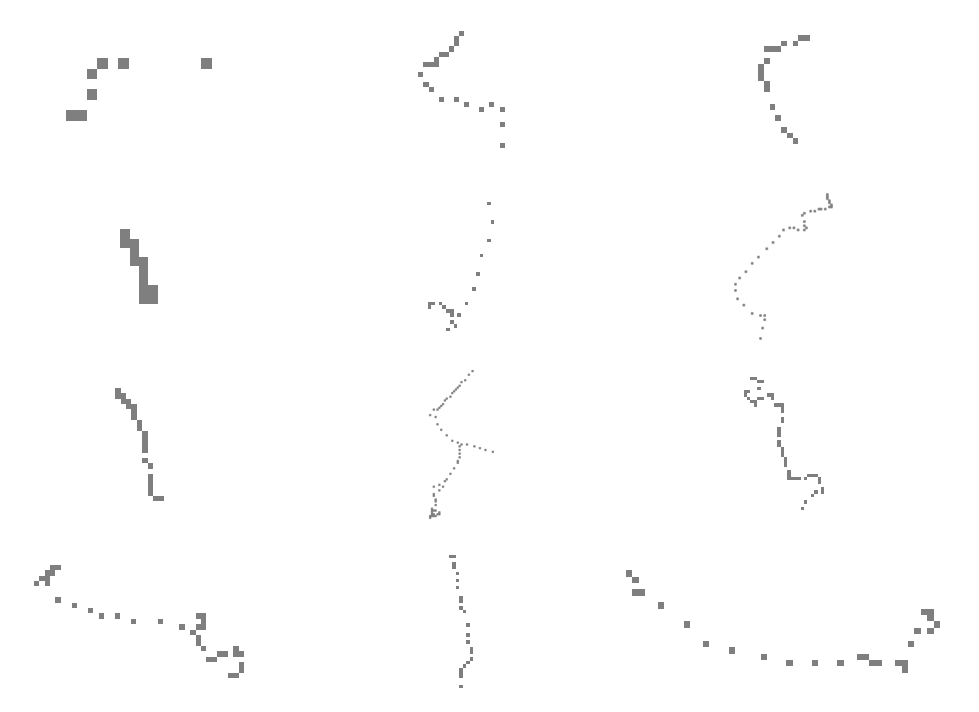

In [187]:
import random
# Load data
with open('data/testData/oneHotVectorData/one_hot_vectors_batch_0_316.json', 'r') as file:
    data = json.load(file)

# Create a figure for subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
   
    key = random.choice(list(data.keys()))
    cell_ids = data[key]
    plot_zoomed_cells_subplot(cell_ids, i, ax=ax)

plt.tight_layout()
plt.show()

In [181]:
# Load data
with open('data/testData/oneHotVectorData/one_hot_df_batch_0_316.json', 'r') as file:
    data = json.load(file)

# Create a figure for subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
   
    key = random.choice(list(data.keys()))
    cell_ids = data[key]
    plot_zoomed_cells_subplot(cell_ids, i, ax=ax)

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/testData/oneHotVectorData/one_hot_df_batch_0_316.json'

## 5. Learning Trajectory Embedding Representation

Given our objective of conducting a next POI prediction and similar trajectory search—two widely practiced tasks in data science—we will first delve into a fundamental problem --- learning embeddings representation for taxi trajectory data. Utilizing advanced deep learning techniques, we aim to learn a unified representation for taxi trajectory data that can support the two downstream tasks (next POI prediction and similarity search). The high-level idea is to use neural networks to learn low-dimensional embedding for taxi trajectory data such that two trajectories have similar spatial and temporal patterns if they are close in the embedding space.

### 5.1 Importing relevant libraries
We opt for the Pytorch libraries to learn and train a deep learning model that embeds taxi trajectory data into low-dimensional vector space. First, we need to import Pytorch libararies

In [80]:
%pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 6.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.1 MB/s eta 0:00:0000:0100:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


### 5.2 Preparing and define the learning model
Since spatial-temporal taxi trajectories are of time series data in nature, we choose Recurrent Neural Networks (RNN) as the model for embedding learning over taxi trajectories. Specifically, an RNN is a classical deep-learning model that can be trained to process a sequential data (or time-series data) input and produce a specific output sequence as prediction. It is typically done by transforming high-dimensional input time-series data into relatively low-dimensional hidden embebdding layers, and making predictions at the final output layer at each time step.

In [145]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

class TaxiTrajectoryGenerator(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, output_size):
        super(TaxiTrajectoryGenerator, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, lengths):
        x = self.embedding(x)
        x_packed = nn.utils.rnn.pack_padded_sequence(x, lengths, batch_first=True, enforce_sorted=False)
        out_packed, (h_n, c_n) = self.lstm(x_packed)
        out, _ = nn.utils.rnn.pad_packed_sequence(out_packed, batch_first=True)
        out = self.fc(out)
        return out


### 5.3 Preprocessing trajectory data


In [146]:
class TaxiTrajectoryDataset(Dataset):
    def __init__(self, sequences):
        self.input_sequences = [sequence[:-1] for sequence in sequences]
        self.target_sequences = [sequence[1:] for sequence in sequences]

    def __len__(self):
        return len(self.input_sequences)

    def __getitem__(self, idx):
        input_seq = self.input_sequences[idx]
        target_seq = self.target_sequences[idx]
        return torch.tensor(input_seq, dtype=torch.long), torch.tensor(target_seq, dtype=torch.long)


In [151]:
import torch
from torch.nn.utils.rnn import pad_sequence

import json

def load_sequences_from_json(file_path, data_size):
    with open(file_path, 'r') as file:
        data = json.load(file) 
    keys = list(data.keys())[:data_size]    
    sequences = [data[str(key)] for key in keys]   
    sequences = [[int(cell_id) for cell_id in sequence] for sequence in sequences]    
    return sequences


def prepare_dataset(directory_path, data_size, start=0, end=100000, step=100000, padding_value=0):
    file_paths = [f"{directory_path}/one_hot_vectors_batch_{i}_{i+step}.json" for i in range(start, end, step)]
    # file_paths.append(f"{directory_path}/one_hot_vectors_batch_1600000_1687544.json")  # Optionally add the last file if needed
    
    all_sequences = []
    for file_path in file_paths:
        sequences = load_sequences_from_json(file_path, data_size)
        all_sequences.extend(sequences)
    
    tensor_sequences = [torch.tensor(sequence) for sequence in all_sequences]
    padded_sequences = pad_sequence(tensor_sequences, batch_first=True, padding_value=padding_value)
    
    
    return padded_sequences




In [73]:
directory_path = 'data/trainData/oneHotVectorData'
dataset = prepare_dataset(directory_path, 100)

### 5.5 Training the learning model




In [148]:
from sklearn.model_selection import KFold


def generate_kfold_indices(data, n_splits=3, shuffle=True, random_state=42):
    """
    Generate K-Fold indices for provided data.

    Parameters:
    - data: The dataset to split. This function does not directly split the data but provides indices for splitting.
    - n_splits: The number of folds. Default is 3.
    - shuffle: Whether to shuffle the data before splitting into batches. Default is True.
    - random_state: Seed used by the random number generator for reproducible output. Default is 42.

    Returns:
    - A list of tuples where each tuple contains the train and test indices for each fold.
    """
    
    # Initialize KFold with the provided parameters
    kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    # Generate and return the fold indices
    folds = list(kf.split(data))
    return folds




In [75]:
folds = generate_kfold_indices(padded_sequences, n_splits=3, shuffle=True, random_state=42)


In [170]:
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold

import os

def cross_validate_model(dataset, folds, num_epochs=5, batch_size=8, lr=0.001, save_dir='trajectoryModels/testtestwaittodelete',padding_value = 0):
    """
    Trains and validates a TaxiTrajectoryGenerator model using K-Fold cross-validation.

    Parameters:
    - dataset: A list of sequences (data points) to be used for training and validation.
    - folds: A list of tuples containing train and validation indices for each fold.
    - num_epochs: Number of epochs to train for each fold. Default is 5.
    - batch_size: Batch size for training and validation. Default is 8.
    - lr: Learning rate for the optimizer. Default is 0.001.
    - save_dir: Directory to save the trained models. Default is 'saved_models'.

    Returns:
    - A tuple of lists containing training losses, validation losses, and accuracies for each fold.
    """
    all_folds_train_loss = []
    all_folds_val_loss = []
    all_folds_accuracy = []

    # Model specifications
    vocab_size = 223 * 168
    embedding_dim = 32
    output_size = vocab_size
    hidden_size = 32
    num_layers = 2

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    for fold, (train_ids, test_ids) in enumerate(folds):
        # Initialize fold-specific lists
        fold_train_loss = []
        fold_val_loss = []
        fold_accuracy = []

        # Split the sequences into training and validation sets
        train_sequences = [dataset[i] for i in train_ids]
        val_sequences = [dataset[i] for i in test_ids]

        # Create the datasets and DataLoaders
        train_dataset = TaxiTrajectoryDataset(train_sequences)
        val_dataset = TaxiTrajectoryDataset(val_sequences)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        # Initialize the model, loss function, and optimizer
        model = TaxiTrajectoryGenerator(vocab_size, embedding_dim, hidden_size, num_layers, output_size)
        if torch.cuda.is_available():
            model.cuda()
#         loss_function = nn.CrossEntropyLoss()  
        loss_function = nn.CrossEntropyLoss(ignore_index=padding_value)
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train the model on the current fold
        for epoch in range(num_epochs):
            model.train()
            train_loss = 0
            correct_predictions = 0
            total_predictions = 0

            for sequences, targets in train_loader:
                if torch.cuda.is_available():
                    sequences, targets = sequences.cuda(), targets.cuda()
                optimizer.zero_grad()
                lengths = [len(sequence) for sequence in sequences]  # Assuming your model takes sequence lengths
                sequence_pred = model(sequences, lengths)  # Adjust according to your model's method signature
                loss = loss_function(sequence_pred.transpose(1, 2), targets)  # Adjust if needed
                loss.backward()
                optimizer.step()
                train_loss += loss.item()

            model.eval()
            val_loss = 0
            with torch.no_grad():
                for sequences, targets in val_loader:
                    if torch.cuda.is_available():
                        sequences, targets = sequences.cuda(), targets.cuda()
                    lengths = [len(sequence) for sequence in sequences]
                    
                    sequence_pred = model(sequences, lengths)
                    loss = loss_function(sequence_pred.transpose(1, 2), targets)
                    val_loss += loss.item()
                    _, predicted = torch.max(sequence_pred, 2)
                    # Create a mask for non-padding values
                    non_padding_mask = targets != padding_value

                    # Count correct predictions where the target is not a padding value
                    correct_predictions += ((predicted == targets) & non_padding_mask).sum().item()

                    # Update total predictions to exclude padding
                    total_predictions += non_padding_mask.sum().item()
#                     print('correct_predictions: ',correct_predictions,'; total_predictions: ',total_predictions)
                   


            accuracy = correct_predictions / total_predictions
            
            # Print fold, epoch, and validation loss
            print(f'Fold {fold}, Epoch {epoch}, Train Loss: {train_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}, Accuracy: {accuracy}')
    
           
            fold_train_loss.append(train_loss / len(train_loader))
            fold_val_loss.append(val_loss / len(val_loader))
            fold_accuracy.append(accuracy)

        all_folds_train_loss.append(fold_train_loss)
        all_folds_val_loss.append(fold_val_loss)
        all_folds_accuracy.append(fold_accuracy)

        # Save the model
        model_save_path = os.path.join(save_dir, f'trajectory_model_fold_{fold}.pt')
        torch.save(model.state_dict(), model_save_path)

    return all_folds_train_loss, all_folds_val_loss, all_folds_accuracy


# def cross_validate_model(dataset, folds, num_epochs=5, batch_size=8, lr=0.001):
#     """
#     Trains and validates a TaxiTrajectoryGenerator model using K-Fold cross-validation.

#     Parameters:
#     - dataset: A list of sequences (data points) to be used for training and validation.
#     - folds: A list of tuples containing train and validation indices for each fold.
#     - num_epochs: Number of epochs to train for each fold. Default is 5.
#     - batch_size: Batch size for training and validation. Default is 8.
#     - lr: Learning rate for the optimizer. Default is 0.001.

#     Returns:
#     - A tuple of lists containing training losses, validation losses, and accuracies for each fold.
#     """
#     all_folds_train_loss = []
#     all_folds_val_loss = []
#     all_folds_accuracy = []

#     # Model specifications
#     vocab_size = 223 * 168
#     embedding_dim = 128
#     output_size = vocab_size
#     hidden_size = 128
#     num_layers = 2

#     for fold, (train_ids, test_ids) in enumerate(folds):
#         # Initialize fold-specific lists
#         fold_train_loss = []
#         fold_val_loss = []
#         fold_accuracy = []

#         # Split the sequences into training and validation sets
#         train_sequences = [dataset[i] for i in train_ids]
#         val_sequences = [dataset[i] for i in test_ids]

#         # Create the datasets and DataLoaders
#         train_dataset = TaxiTrajectoryDataset(train_sequences)
#         val_dataset = TaxiTrajectoryDataset(val_sequences)
#         train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#         val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#         # Initialize the model, loss function, and optimizer
#         model = TaxiTrajectoryGenerator(vocab_size, embedding_dim, hidden_size, num_layers, output_size)
#         loss_function = nn.CrossEntropyLoss()  
#         optimizer = optim.Adam(model.parameters(), lr=lr)

#         # Train the model on the current fold
#         for epoch in range(num_epochs):
#             model.train()
#             train_loss = 0
#             correct_predictions = 0
#             total_predictions = 0

#             for sequences, targets in train_loader:
#                 optimizer.zero_grad()
#                 lengths = [len(sequence) for sequence in sequences]  # Assuming your model takes sequence lengths
#                 sequence_pred = model(sequences, lengths)  # Adjust according to your model's method signature
#                 loss = loss_function(sequence_pred.transpose(1, 2), targets)  # Adjust if needed
#                 loss.backward()
#                 optimizer.step()
#                 train_loss += loss.item()

#             model.eval()
#             val_loss = 0
#             with torch.no_grad():
#                 for sequences, targets in val_loader:
#                     lengths = [len(sequence) for sequence in sequences]
#                     sequence_pred = model(sequences, lengths)
#                     loss = loss_function(sequence_pred.transpose(1, 2), targets)
#                     val_loss += loss.item()
#                     _, predicted = torch.max(sequence_pred, 2)
#                     correct_predictions += (predicted == targets).sum().item()
#                     total_predictions += targets.nelement()

#             accuracy = correct_predictions / total_predictions
            
#             # Print fold, epoch, and validation loss
#             print(f'Fold {fold}, Epoch {epoch}, Train Loss: {train_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}, Accuracy: {accuracy}')
    
#             fold_train_loss.append(train_loss / len(train_loader))
#             fold_val_loss.append(val_loss / len(val_loader))
#             fold_accuracy.append(accuracy)

#         all_folds_train_loss.append(fold_train_loss)
#         all_folds_val_loss.append(fold_val_loss)
#         all_folds_accuracy.append(fold_accuracy)

#     return all_folds_train_loss, all_folds_val_loss, all_folds_accuracy



In [79]:
all_train_loss, all_val_loss, all_accuracy = cross_validate_model(padded_sequences, folds)


/var/folders/k6/532x89vs5pb6w5twy9by4tl80000gn/T/ipykernel_43501/1362481826.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(input_seq, dtype=torch.long), torch.tensor(target_seq, dtype=torch.long)


Fold 0, Epoch 0, Train Loss: 9.449348343743218, Val Loss: 7.610257625579834, Accuracy: 0.7269199346405228
Fold 0, Epoch 1, Train Loss: 5.975944704479641, Val Loss: 4.49933934211731, Accuracy: 0.7285539215686274
Fold 0, Epoch 2, Train Loss: 3.2474461131625705, Val Loss: 2.987789273262024, Accuracy: 0.7287581699346405
Fold 0, Epoch 3, Train Loss: 2.41401199499766, Val Loss: 2.896636176109314, Accuracy: 0.7287581699346405
Fold 0, Epoch 4, Train Loss: 2.1273718410068088, Val Loss: 2.902197074890137, Accuracy: 0.7287581699346405
Fold 1, Epoch 0, Train Loss: 9.402845011817085, Val Loss: 7.338572025299072, Accuracy: 0.7699915824915825
Fold 1, Epoch 1, Train Loss: 6.233848465813531, Val Loss: 4.010483169555664, Accuracy: 0.7727272727272727
Fold 1, Epoch 2, Train Loss: 3.5093127621544733, Val Loss: 2.3735161781311036, Accuracy: 0.7729377104377104
Fold 1, Epoch 3, Train Loss: 2.526863614718119, Val Loss: 2.2107461214065554, Accuracy: 0.7729377104377104
Fold 1, Epoch 4, Train Loss: 2.401533391740

In [115]:
def plot_training_validation_loss_and_accuracy(avg_train_loss, avg_val_loss, avg_accuracy):
    """
    Plots the average training and validation loss, and the average accuracy over epochs.

    Parameters:
    - avg_train_loss: A list of average training losses over epochs.
    - avg_val_loss: A list of average validation losses over epochs.
    - avg_accuracy: A list of average accuracies over epochs.
    """
    plt.figure(figsize=(12, 5))
    
    # Plotting the average training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(avg_train_loss, label='Average Training Loss')
    plt.plot(avg_val_loss, label='Average Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training & Validation Loss Over Epochs')
    plt.legend()
    
    # Plotting the average accuracy
    plt.subplot(1, 2, 2)
    plt.plot(avg_accuracy, label='Average Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.show()




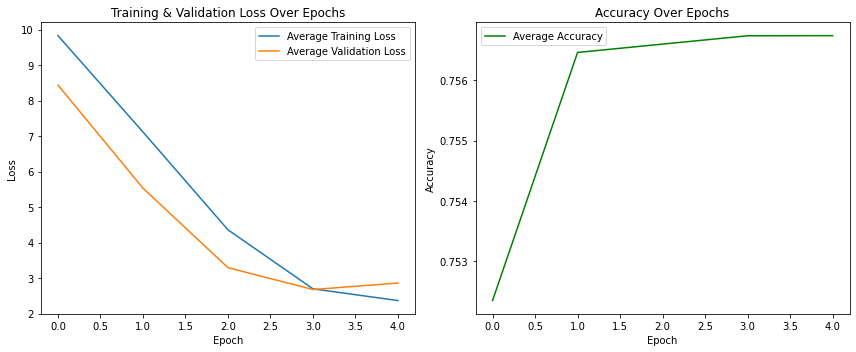

In [81]:
plot_training_validation_loss_and_accuracy(avg_train_loss, avg_val_loss, avg_accuracy)

In [166]:
directory_path = 'data/trainData/oneHotVectorData'
dataset = prepare_dataset(directory_path, 1000)
folds = generate_kfold_indices(dataset, n_splits=3, shuffle=True, random_state=42)
all_train_loss, all_val_loss, all_accuracy = cross_validate_model(dataset, folds)


/var/folders/k6/532x89vs5pb6w5twy9by4tl80000gn/T/ipykernel_43501/1362481826.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(input_seq, dtype=torch.long), torch.tensor(target_seq, dtype=torch.long)


KeyboardInterrupt: 

In [ ]:
plot_training_validation_loss_and_accuracy(avg_train_loss, avg_val_loss, avg_accuracy)

In [169]:
directory_path = 'data/trainData/oneHotVectorData'
dataset = prepare_dataset(directory_path, 100)
folds = generate_kfold_indices(dataset, n_splits=3, shuffle=True, random_state=42)
all_train_loss, all_val_loss, all_accuracy = cross_validate_model(dataset, folds,num_epochs=50)


/var/folders/k6/532x89vs5pb6w5twy9by4tl80000gn/T/ipykernel_43501/1362481826.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(input_seq, dtype=torch.long), torch.tensor(target_seq, dtype=torch.long)


Fold 0, Epoch 0, Train Loss: 10.527324464586046, Val Loss: 10.505381202697754, Accuracy: 0.0
Fold 0, Epoch 1, Train Loss: 10.453518019782173, Val Loss: 10.466081809997558, Accuracy: 0.0
Fold 0, Epoch 2, Train Loss: 10.302229669358995, Val Loss: 10.31632137298584, Accuracy: 0.0
Fold 0, Epoch 3, Train Loss: 9.598952187432182, Val Loss: 9.799979782104492, Accuracy: 0.0007530120481927711
Fold 0, Epoch 4, Train Loss: 8.466712209913466, Val Loss: 9.482545089721679, Accuracy: 0.0015060240963855422
Fold 0, Epoch 5, Train Loss: 7.59634002049764, Val Loss: 9.533462142944336, Accuracy: 0.006024096385542169
Fold 0, Epoch 6, Train Loss: 7.160115136040582, Val Loss: 9.694058418273926, Accuracy: 0.0007530120481927711
Fold 0, Epoch 7, Train Loss: 6.973118570115831, Val Loss: 9.842063522338867, Accuracy: 0.006024096385542169
Fold 0, Epoch 8, Train Loss: 6.9068815973069935, Val Loss: 9.962700462341308, Accuracy: 0.006024096385542169
Fold 0, Epoch 9, Train Loss: 6.848419401380751, Val Loss: 10.0685352325

KeyboardInterrupt: 

In [171]:
directory_path = 'data/trainData/oneHotVectorData'
dataset = prepare_dataset(directory_path, 100)
folds = generate_kfold_indices(dataset, n_splits=3, shuffle=True, random_state=42)
all_train_loss, all_val_loss, all_accuracy = cross_validate_model(dataset, folds,num_epochs=50)


/var/folders/k6/532x89vs5pb6w5twy9by4tl80000gn/T/ipykernel_43501/1362481826.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(input_seq, dtype=torch.long), torch.tensor(target_seq, dtype=torch.long)


Fold 0, Epoch 0, Train Loss: 10.534472783406576, Val Loss: 10.518127822875977, Accuracy: 0.0007530120481927711
Fold 0, Epoch 1, Train Loss: 10.479749891493055, Val Loss: 10.49218807220459, Accuracy: 0.0007530120481927711
Fold 0, Epoch 2, Train Loss: 10.408186700608995, Val Loss: 10.439935302734375, Accuracy: 0.0007530120481927711
Fold 0, Epoch 3, Train Loss: 10.206404580010307, Val Loss: 10.292965316772461, Accuracy: 0.0007530120481927711
Fold 0, Epoch 4, Train Loss: 9.742474661933052, Val Loss: 10.026091957092286, Accuracy: 0.0007530120481927711
Fold 0, Epoch 5, Train Loss: 9.093077341715494, Val Loss: 9.754343605041504, Accuracy: 0.0007530120481927711
Fold 0, Epoch 6, Train Loss: 8.4400634765625, Val Loss: 9.56874122619629, Accuracy: 0.0015060240963855422
Fold 0, Epoch 7, Train Loss: 7.929052988688151, Val Loss: 9.492411422729493, Accuracy: 0.0030120481927710845
Fold 0, Epoch 8, Train Loss: 7.6490086449517145, Val Loss: 9.48300838470459, Accuracy: 0.0030120481927710845
Fold 0, Epoch 

KeyboardInterrupt: 

In [172]:
directory_path = 'data/trainData/oneHotVectorData'
dataset = prepare_dataset(directory_path, 1000)
folds = generate_kfold_indices(dataset, n_splits=3, shuffle=True, random_state=42)
all_train_loss, all_val_loss, all_accuracy = cross_validate_model(dataset, folds,num_epochs=50)


/var/folders/k6/532x89vs5pb6w5twy9by4tl80000gn/T/ipykernel_43501/1362481826.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(input_seq, dtype=torch.long), torch.tensor(target_seq, dtype=torch.long)


KeyboardInterrupt: 

### 5.6 Save the trained model


In [ ]:

train_df_call_type_b = train_df.copy().dropna(subset=['ORIGIN_STAND'])
selected_features_call_type_b = train_df_call_type_b[['ORIGIN_STAND', 'TAXI_ID', 'DAY_TYPE_REVISED_NUMERIC', 'TIMESTAMP']]
plot_correlation_heatmap(selected_features_call_type_b)

The scatter plots show no clear patterns, indicating that how a taxi is called (from a center, stand, or street) and the time its trajectory is generated appear to be random. There's no apparent non-linear relationship, supporting the idea that these events are independent and occur without a predictable pattern.

## 6. Next POI Prediction


### 6.1 Preparing test data

### 6.2 Predicting next POI using the trained model

In [ ]:
import torch

def predict_next_cells(model, start_sequence, num_predictions):
    """
    Predicts the next cell IDs in a trajectory given a starting sequence.

    Parameters:
    - model: The trained TaxiTrajectoryGenerator model.
    - start_sequence: The starting sequence of cell IDs as a tensor.
    - num_predictions: The number of cell IDs to predict after the starting sequence.

    Returns:
    - A list containing the predicted sequence of cell IDs.
    """
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to track gradients
        current_sequence = start_sequence
        predictions = []
        for _ in range(num_predictions):
            # Assuming your model expects lengths, you need to provide the current sequence length
            lengths = [len(current_sequence)]
            prediction = model(current_sequence.unsqueeze(0), lengths)  # Add batch dimension
            # Assuming your output is logits and you want the most likely next cell ID
            predicted_cell_id = prediction.argmax(dim=2)[:,-1]  # Get the last prediction
            predictions.append(predicted_cell_id.item())  # Store the prediction
            # Prepare the next input sequence; here, we simply append the prediction (you might need to adjust based on your input format)
            current_sequence = torch.cat((current_sequence, predicted_cell_id), dim=0)

    return predictions


In [95]:
import torch
from torch.nn import Embedding, LSTM, Linear
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

# Assuming the TaxiTrajectoryGenerator class definition is available in your environment

# Model specifications - ensure these match those used during training
vocab_size = 223 * 168  # Adjust if your vocab size is different
embedding_dim = 32
hidden_size = 32
num_layers = 2
output_size = vocab_size

# Recreate the model instance
model = TaxiTrajectoryGenerator(vocab_size, embedding_dim, hidden_size, num_layers, output_size)

# Load the trained model weights
model_path = 'trajectoryModels/model_fold_2.pt'
model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))  # or 'cuda' if using GPU

model.eval()  # Set the model to evaluation mode


TaxiTrajectoryGenerator(
  (embedding): Embedding(37464, 32)
  (lstm): LSTM(32, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=37464, bias=True)
)

In [108]:
# Test trajectory
test_trajectory_target = [17546,17714,17713,17712,17710,17708,17875,17875,18042,18042,18042,18042,18042,18042,18209,18209,18546,18715,18715,18715,18715,18883,18883,18883,18884,18884,18884,19052,19052,18884,19052,19052,19052,19052,19220,19220,19220,19220,19220,19220,19220,19220,19219,19219,19219,19218,19217,19217,19217,19217,19217,19216,19216,19214,19213,19213,19213,19380,19380,19717,20053,20222,20222,20390,20390,20390,20390,20390,20390,20558,20726,20893,21060,21060,21228,21228,21228,21228,21228,21228,21228,21228,21228,21228,21228,21228,21228,21229,21229,21229,21229,21229,21229,21229,21229,21397,21397,21229,21229,21229,21397,21398,21398,21398,21398,21398,21398,21565,21564,21564,21564]
test_trajectory = test_trajectory_target[:5]
for i in range(5, len(test_trajectory_target)):
    test_trajectory.extend([0])
print(test_trajectory)
print(len(test_trajectory_target))
print(len(test_trajectory))
# Convert to tensor
test_trajectory_tensor = torch.tensor(test_trajectory_target, dtype=torch.long).unsqueeze(0)  # Add batch dimension


[17546, 17714, 17713, 17712, 17710, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
111
111


In [109]:
def predict_next_cell(model, sequence):
    """
    Predict the next cell ID for a given sequence.

    Parameters:
    - model: The trained TaxiTrajectoryGenerator model.
    - sequence: The sequence of cell IDs as a tensor, with batch dimension.
    
    Returns:
    - predicted_cell_id: The predicted next cell ID.
    """
    with torch.no_grad():
        # Assuming your model's forward method requires lengths
        lengths = [len(sequence[0])]
        print(sequence[0])
        predictions = model(sequence, lengths)
        print(predictions.argmax(dim=2))
        # Assuming the last prediction is what we're interested in
        predicted_cell_id = predictions.argmax(dim=2)[:,-3]  # Get the last prediction in the sequence
        
    return predicted_cell_id.item()

# Use the function to predict the next cell ID
next_cell_id = predict_next_cell(model, test_trajectory_tensor)
print(f"Predicted next cell ID: {next_cell_id}")


tensor([17546, 17714, 17713, 17712, 17710, 17708, 17875, 17875, 18042, 18042,
        18042, 18042, 18042, 18042, 18209, 18209, 18546, 18715, 18715, 18715,
        18715, 18883, 18883, 18883, 18884, 18884, 18884, 19052, 19052, 18884,
        19052, 19052, 19052, 19052, 19220, 19220, 19220, 19220, 19220, 19220,
        19220, 19220, 19219, 19219, 19219, 19218, 19217, 19217, 19217, 19217,
        19217, 19216, 19216, 19214, 19213, 19213, 19213, 19380, 19380, 19717,
        20053, 20222, 20222, 20390, 20390, 20390, 20390, 20390, 20390, 20558,
        20726, 20893, 21060, 21060, 21228, 21228, 21228, 21228, 21228, 21228,
        21228, 21228, 21228, 21228, 21228, 21228, 21228, 21229, 21229, 21229,
        21229, 21229, 21229, 21229, 21229, 21397, 21397, 21229, 21229, 21229,
        21397, 21398, 21398, 21398, 21398, 21398, 21398, 21565, 21564, 21564,
        21564])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### 6.1 Caculating the accuracy

### 6.1 Visualzing the results

## 7. Efficient Similar Trajectory Search



 ### 7.1 Load Langchian Libraries

 ### 7.2 Indexing learned trajectory embedding

 ### 7.3 Search a trajectory

 ### 7.4 Measureing the efficiency

## 8. Data Limitations

**Data Completeness**:

- The completeness of the GPS data stream varies for each trip. The "MISSING_DATA" field indicates whether there are missing GPS locations during the trip.
- The reliability of the data may be affected if there are missing GPS coordinates.

**Data Scope Limitation**:

- The analysis is restricted to taxi trajectory data from a single city for a specific year due to computational constraints. However, the analytical procedures and techniques employed can be expanded to a broader context, encompassing multiple cities, spanning several years, and incorporating diverse transportation trajectories beyond taxis.
- When applying the same methods to larger and more varied datasets, it is essential to consider the scalability and generalization of the analysis to different transportation contexts.
